# Part I - Bike Sharing Data Exploration
## by Michael Muuwo Mutie

## Introduction
> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area.

## Preliminary Wrangling


In [1]:
# import necessary packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

Let us start by loading the dataset so that we can explore it. We will use pandas, 'read_csv' function to achieve this

In [2]:
# loading the dataset into rideData Dataframe
rideData = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
rideData.shape # let us find out the number of rows and columns

(183412, 16)

In [4]:
rideData.dtypes #checking for the data type of each feature

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [5]:
rideData.describe() #let us get some summary statistics

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
rideData.columns # let us list all the columns in the dataFrame

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [7]:
rideData.sample(5) #let us check a sample of our dataset

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
29824,689,2019-02-25 06:10:59.0950,2019-02-25 06:22:28.3200,321.0,5th St at Folsom,37.780146,-122.403071,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,6505,Subscriber,1981.0,Female,No
103449,824,2019-02-14 12:50:59.4720,2019-02-14 13:04:44.4450,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,5412,Subscriber,1980.0,Male,No
174004,487,2019-02-03 01:20:22.9110,2019-02-03 01:28:30.5590,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,370.0,Jones St at Post St,37.787327,-122.413278,5331,Subscriber,1994.0,Male,No
87805,647,2019-02-16 22:21:16.0100,2019-02-16 22:32:03.7810,132.0,24th St at Chattanooga St,37.751819,-122.426614,136.0,23rd St at San Bruno Ave,37.754436,-122.404364,5436,Subscriber,1993.0,Male,No
137155,354,2019-02-08 08:58:36.0170,2019-02-08 09:04:30.7440,87.0,Folsom St at 13th St,37.769757,-122.415674,321.0,5th St at Folsom,37.780146,-122.403071,5030,Subscriber,1988.0,Male,No


In [8]:
sum(rideData.duplicated()) # checking if we have dumplicated entries

0

In [9]:
rideData.nunique() # checking number of unique values

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

> we can notice that we have 329 starting points and 329 destinations

In [10]:
rideData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

> out of the 183412 we have 8265 rows with missing values

# SOME CLEANING NEEDED.

In [11]:
copyRideData = rideData.copy() # first we make a copy of the dataFrame

In [12]:
# next let us get rid of the 8265 rows with missing data
copyRideData = copyRideData.dropna(how = 'any', axis = 0)

In [13]:
# Convert bike_id from int to string
copyRideData['bike_id'] = copyRideData['bike_id'].astype(str)

In [14]:
# Convert bike_share_for_all_trip to boolean data type
copyRideData.bike_share_for_all_trip = (copyRideData.bike_share_for_all_trip == 'Yes')

In [15]:
# Create new column 'age' containing ages of the riders.
copyRideData['age'] = 2022 - copyRideData.member_birth_year


In [16]:
# let us check if our changes have been effected
copyRideData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  object 
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

174952 rows are sufficient for our analysis

### What is the structure of your dataset?

> We have 174952 recorded rides and the dataset has 17 features. 9 of the variables are numeric in nature (ie int and float). We have added a new feature (age) that contains the current ages of the riders.

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in the duration_sec feature

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- start_station_name
- end_station_name
- bike_id
- user_type
- age
- member_gender
- bike_share_for_all_trip

## Univariate Exploration

### QUESTION
what is the distribution in terms of gender

Text(0, 0.5, 'frequency')

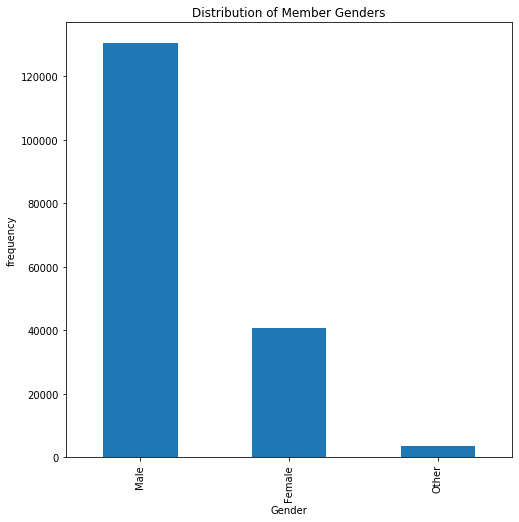

In [17]:
# using bar graph for visualization of the GENDER distribution
df1 = copyRideData['member_gender'].value_counts()
df1.plot(kind='bar',figsize=(8,8))
plt.title('Distribution of Member Genders')
plt.xlabel('Gender')
plt.ylabel('frequency')


our data set has more than thrice the number of male compared to female while a smaller fraction identified as other gender.

### QUESTION
what is the distribution in terms of user type

Text(0, 0.5, 'frequency')

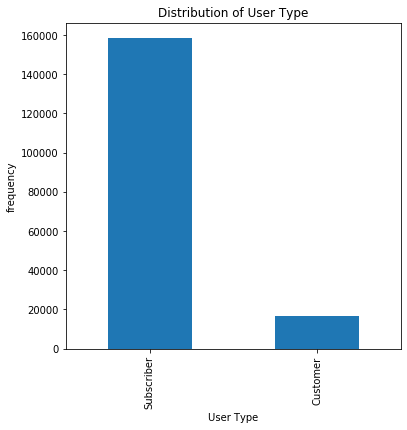

In [18]:
# using bar graph for visualization of the USER_TYPE distribution
df2 = copyRideData['user_type'].value_counts()
df2.plot(kind='bar',figsize=(6,6))
plt.title('Distribution of User Type')
plt.xlabel('User Type')
plt.ylabel('frequency')


Majority of the users were subscribers as compared to cutomers.

### QUESTION
what is the distribution in terms of bike share

Text(0, 0.5, 'frequency')

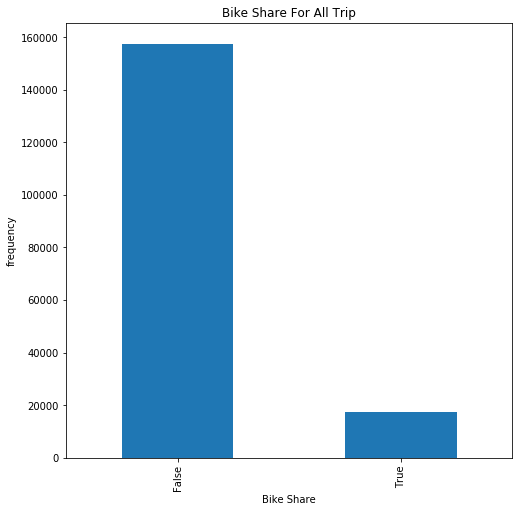

In [19]:
# using bar graph for visualization of the bike_share_for_all_trip distribution
df3 = copyRideData['bike_share_for_all_trip'].value_counts()
df3.plot(kind='bar',figsize=(8,8))
plt.title('Bike Share For All Trip')
plt.xlabel('Bike Share')
plt.ylabel('frequency')


### Question
what is the distribution in terms of age

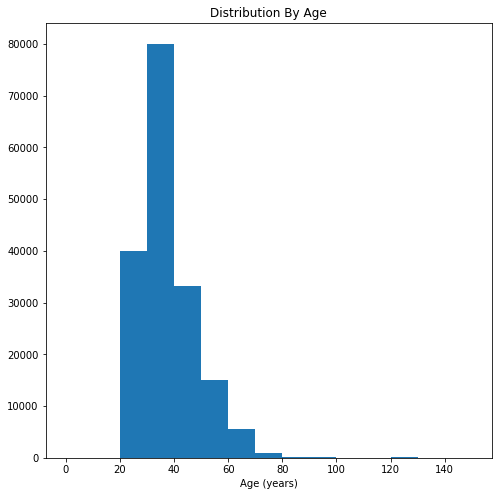

In [20]:
# let us use a histogram to visualise age. 

binsize = 10
bins = np.arange(0, copyRideData['age'].max()+binsize, binsize)

plt.figure(figsize=[8, 8])
plt.hist(data = copyRideData, x = 'age', bins = bins)
plt.title('Distribution By Age')
plt.xlabel('Age (years)')
plt.show()

most of the riders are currently aged between 30 to 40 years

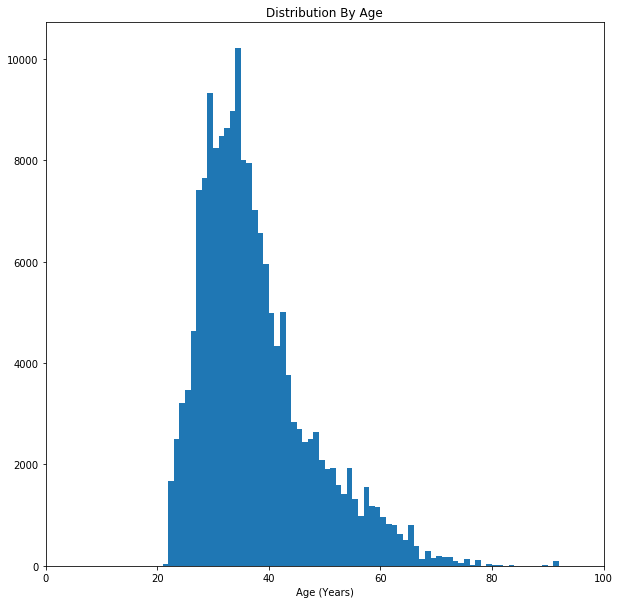

In [21]:
# investigating using smaller bin
binsize = 1
bins = np.arange(0, copyRideData['age'].max()+binsize, binsize)

plt.figure(figsize=[10, 10])
plt.hist(data = copyRideData, x = 'age', bins = bins)
plt.xlim([0,100])
plt.title('Distribution By Age')
plt.xlabel('Age (Years)')
plt.show()

### Question
what is the distribution in terms of duration.

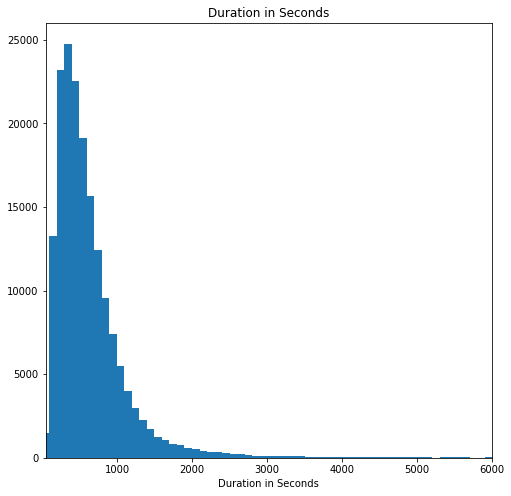

In [22]:
binsize = 100
bins = np.arange(0, copyRideData['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 8])
plt.hist(data = copyRideData, x = 'duration_sec', bins = bins)
plt.xlim([50,6000])
plt.title('Duration in Seconds')
plt.xlabel('Duration in Seconds')
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- The gender distribution has male as the majority followed by female and then 'other gender' being the least.
- The user_type had more subscribers than ordinary customers.
- For the ages, most riders are between 30 and 40 years old 
- The duration in seconds is skewed to the right.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- I noticed a few rows with missing data. I tidied this by getting rid of the rows with missing values. I did this because these rows would distort my analysis. By dropping them, there is little negative effect since the said rows are a very small fraction of the data set
- I realised bike_id is in int data type. Although the ids are numbers, they can not be used for computational purposes. The ids are used as lables hence they are better saved as string data type. 
- I changed the bike_share_for_all_trip to boolean data type
- I have created a new feature named 'age' that contains the current age of the riders

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Duration in seconds vs Age of riders

### Question
What is the relation between the duration a rider takes and their age.

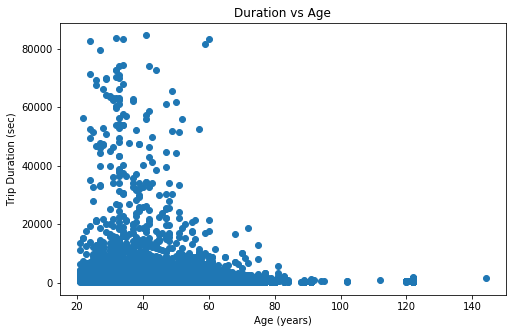

In [23]:
numeric_vars = ['duration_sec', 'age']

plt.figure(figsize=[8,5])
plt.scatter(data = copyRideData, x = 'age', y ='duration_sec', alpha= None)
plt.title('Duration vs Age')
plt.xlabel('Age (years)')
plt.ylabel('Trip Duration (sec)')
plt.show()

The visualisation communicates that the younger riders took more time riding as compared to the older riders.

### Question
What is the relationship between user_type and age

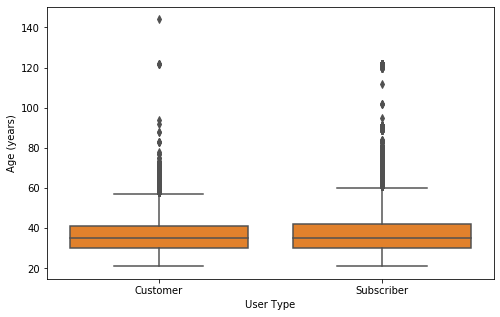

In [24]:
plt.figure(figsize = [8, 5])
color = sb.color_palette()[1]
sb.boxplot(data = copyRideData, x = 'user_type', y = 'age', color = color)
plt.xlabel('User Type')
plt.ylabel('Age (years)')
plt.show()

we can trim the age to get a better visualisation of the ages

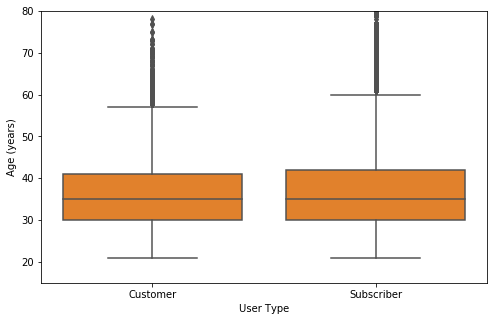

In [25]:
plt.figure(figsize = [8, 5])
color = sb.color_palette()[1]
sb.boxplot(data = copyRideData, x = 'user_type', y = 'age', color = color)
plt.ylim([15, 80])
plt.xlabel('User Type')
plt.ylabel('Age (years)')
plt.show()

we observe that subscribers are slightly older than customers.

### Question
what is the relationship between user_type and the amount of time the user takes riding

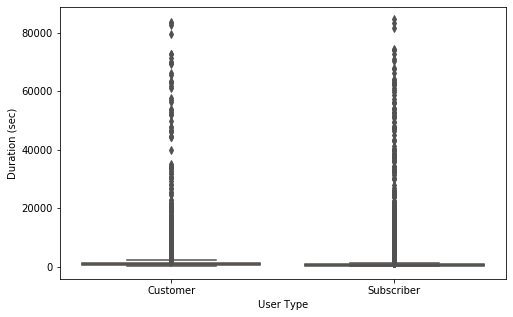

In [26]:
plt.figure(figsize = [8, 5])
color = sb.color_palette()[1]
sb.boxplot(data = copyRideData, x = 'user_type', y = 'duration_sec', color = color)
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.show()

we will have to trim the duration to about 60000 seconds

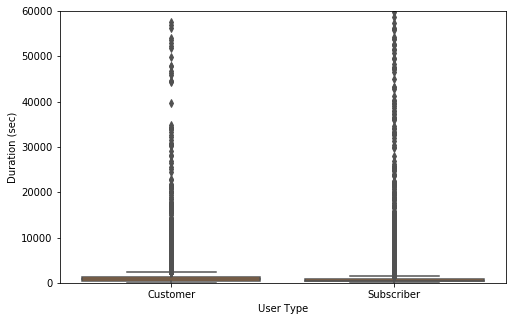

In [27]:
plt.figure(figsize = [8, 5])
color = sb.color_palette()[1]
sb.boxplot(data = copyRideData, x = 'user_type', y = 'duration_sec', color = color)
plt.ylim(0, 60000)
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.show()

we are still unable to generate a box plot. Let us trim further to 3000

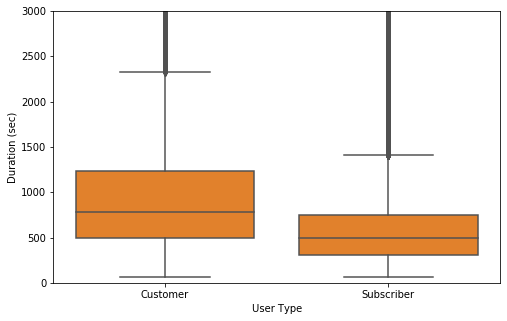

In [28]:
plt.figure(figsize = [8, 5])
color = sb.color_palette()[1]
sb.boxplot(data = copyRideData, x = 'user_type', y = 'duration_sec', color = color)
plt.ylim(0, 3000)
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.show()

we note that walk in customers took longer rides than registered subscribers.

### Question
what is the relationship between member gender and duration

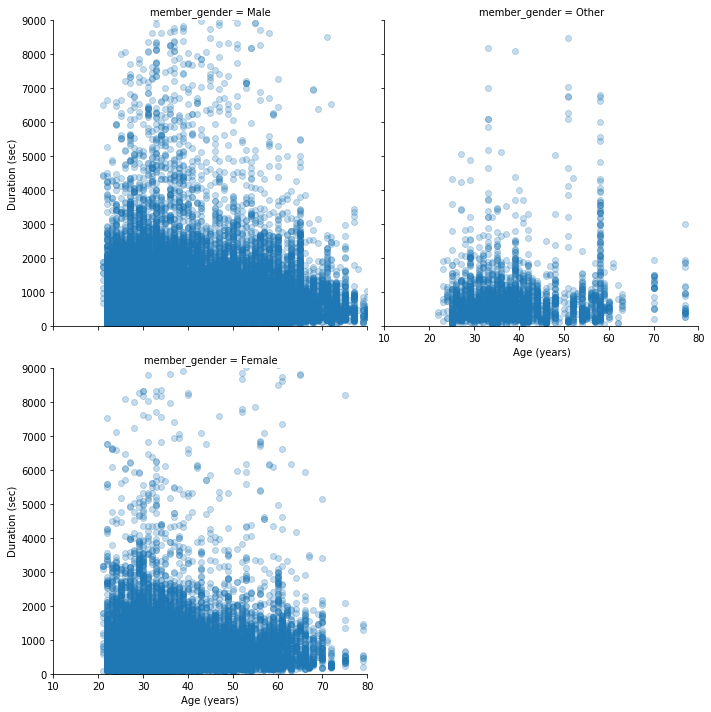

In [29]:
genders = sb.FacetGrid(data = copyRideData, col = 'member_gender', col_wrap = 2, height = 5,
                 xlim = [10, 80], ylim = [0, 9000])
genders.map(plt.scatter, 'age', 'duration_sec', alpha=0.25)
genders.set_xlabels('Age (years)')
genders.set_ylabels('Duration (sec)')

plt.show()

- we have more younger males taking long rides as compared to older male
- age does not seeem to have a big effect on duration of rides in women
- for those who identify as 'other gender', we have a spike of longer rides between age 50 to 60

### Question
What is the relation between member gender and their age

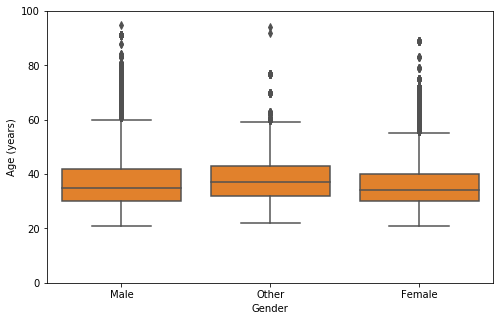

In [30]:
plt.figure(figsize = [8, 5])
color = sb.color_palette()[1]
sb.boxplot(data = copyRideData, x = 'member_gender', y = 'age', color = color)
plt.ylim(0, 100)
plt.xlabel('Gender')
plt.ylabel('Age (years)')
plt.show()

let us trim further

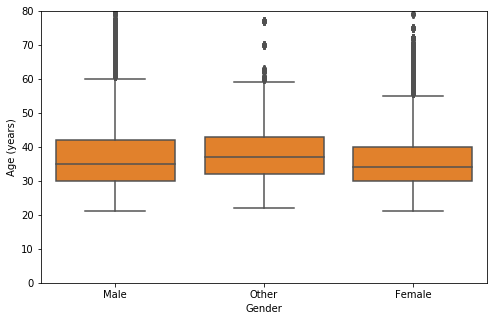

In [31]:
plt.figure(figsize = [8, 5])
color = sb.color_palette()[1]
sb.boxplot(data = copyRideData, x = 'member_gender', y = 'age', color = color)
plt.ylim(0, 80)
plt.xlabel('Gender')
plt.ylabel('Age (years)')
plt.show()

we have younger female riders compared to other gender and male

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Younger riders took longer rides
- customers took longer rides than subscribers
- We have a majority of younger males taking longer rides compared to older males
- age does not seem to have a big effect on duration of rides among women
- we notice a spike of longer rides among 'other gender' aged between 50-60 years.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Subribers are slightly older than customers

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Question
What is the relationship between duration, age and user type

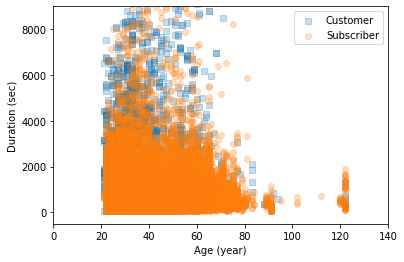

In [32]:
user_type_markers = [['Customer', 's'],['Subscriber', 'o']]

for utype, marker in user_type_markers:
    df_utype = copyRideData[copyRideData['user_type'] == utype]
    plt.scatter((df_utype['age']), df_utype['duration_sec'], marker = marker, alpha=0.25)
plt.legend(['Customer','Subscriber'])
plt.axis([0, 140, -500, 9000 ])
plt.xlabel('Age (year)')
plt.ylabel('Duration (sec)')
plt.show()

<Figure size 1080x1080 with 0 Axes>

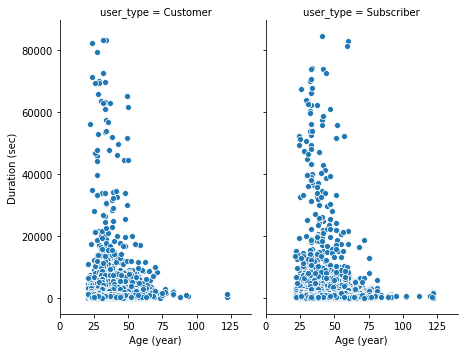

In [33]:
plt.figure(figsize=[15,15])
g = sb.FacetGrid(data = copyRideData, col = 'user_type', col_wrap = 2, height = 5, aspect =0.65, xlim = [0, 140])
g.map_dataframe(sb.scatterplot, 'age', 'duration_sec', alpha= None)
g.set_axis_labels('Age (year)', 'Duration (sec)')
g.add_legend()
plt.show()


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In both customers and subscribers, we have younger riders taking longer rides compared to the older riders.

### Were there any interesting or surprising interactions between features?

> There seems to be more older subscribers compared to customers.

## Conclusions
> Having younger few older customers may be an indication that a good number of the customers end up becoming members over time. We also note that younger riders enjoy the rides because they are taking longer rides.